# 30회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : 캐글어딘가.. 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv
- 데이터 설명 : 혈압 데이터 DBP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1-1  EDA를 시행하라 

       Age Gender      BMI    DBP      FPG     Chol      Tri      HDL  \
결측치      0      0        0      0        0        1        0        0   
유니크     70      2      275     75      361      486      478      188   
타입   int64  int64  float64  int64  float64  float64  float64  float64   

         LDL      ALT      CCR     FFPG  
결측치        0        0        0        0  
유니크      384      680      700      479  
타입   float64  float64  float64  float64  
독립변수는 총 10개이며 범주형 1개, 수치형 10개이다.
Chol칼럼에서 결측치가 1개 확인되며 그 외 칼럼에서는 결측치가 확인되지 않는다.
종속변수인 DBP칼럼의 분포를 확인해본 결과 변환은 필요없을 것 같다고 판단된다.
Tri를 비롯한 몇몇 칼럼에서 이상치가 있는 것으로 확인된다.
이상치가 보이는 칼럼들 중 CCR은 과도하게 작은 수치가 확인되는 것으로 보아 측정에 오류가 있는것으로 보인다.
Hdl칼럼은 5에서 잘려있는것으로 보인다.


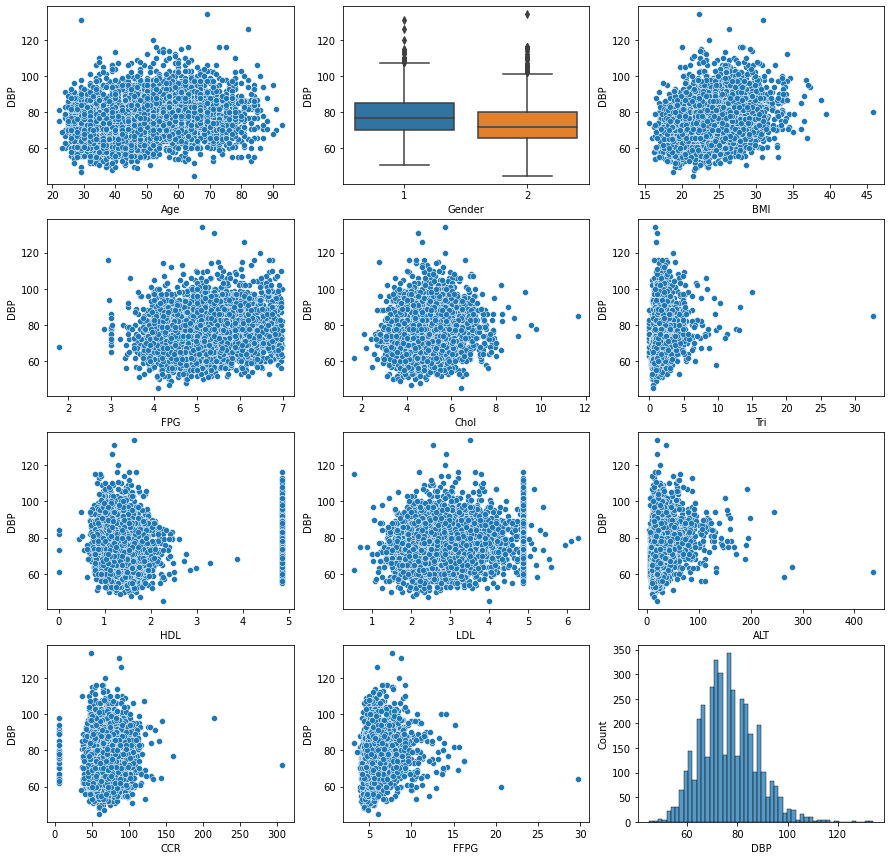

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv')
data.head(10)

null = data.isna().sum().to_frame().T
null.index = ['결측치']
unique = data.nunique().to_frame().T
unique.index = ['유니크']
types = data.dtypes.to_frame().T
types.index = ['타입']
info = pd.concat([null, unique, types])
print(info)

fig, axes = plt.subplots(4,3, figsize = (15,15))
l = data.columns.to_list()
l.remove('DBP')

for i, ax in zip(l, axes.flat[:-1]):
    if i == 'Gender':
        sns.boxplot(data[i], data['DBP'], x= i, y = 'DBP', ax = ax)
    else:
        sns.scatterplot(data[i], data['DBP'], x= i, y = 'DBP', ax = ax)

sns.histplot(data = data['DBP'], ax = axes.flat[11])

print('독립변수는 총 10개이며 범주형 1개, 수치형 10개이다.')
print('Chol칼럼에서 결측치가 1개 확인되며 그 외 칼럼에서는 결측치가 확인되지 않는다.')
print('종속변수인 DBP칼럼의 분포를 확인해본 결과 변환은 필요없을 것 같다고 판단된다.')
print('Tri를 비롯한 몇몇 칼럼에서 이상치가 있는 것으로 확인된다.')
print('이상치가 보이는 칼럼들 중 CCR은 과도하게 작은 수치가 확인되는 것으로 보아 측정에 오류가 있는것으로 보인다.')
print('Hdl칼럼은 5에서 잘려있는것으로 보인다.')

## 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라

In [3]:
data_copy = data[data['HDL'] != 4.860753]
data_copy = data_copy[data_copy['LDL'] != 4.860753]
data_copy = data_copy[data_copy['CCR'] != 4.860753]

data_copy['Chol'] = data_copy['Chol'].fillna(data_copy.Chol.mean())


for j in ['Age','BMI', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'CCR', 'FFPG']:
    first_quantile = data_copy['%s'%j].quantile(0.25)
    third_quantile = data_copy['%s'%j].quantile(0.75)
    IQR = third_quantile - first_quantile
    outliers = data_copy[(data_copy['%s'%j]>third_quantile + 1.5*IQR) | (data_copy['%s'%j]<first_quantile - 1.5*IQR)][['%s'%j]]
    print(j)
    print(len(outliers))
    print(max(outliers.values))
    
data_copy = data_copy[data_copy['Tri']<30]
data_copy = data_copy[data_copy['ALT']<400]
data_copy = data_copy[data_copy['CCR']<300]
data_copy = data_copy[data_copy['FFPG']<29]

print('HDL, LDL, CCR 칼럼에서 값이 4.860753인 칼럼이 대량 검출되었고 오류가 있는것으로 판단되어 전부 제거.')
print('Chol칼럼에 결측치가 1건 있었고 이를 평균으로 대체.')
print('IQR로 이상치 판단시 이상치로 판단되는건이 300건 이상이었고 이를 전부 제거시 데이터의 손실이 클것으로 판단')
print('Tri, ALT, CCR, FFPG 칼럼의 산점도에서 확인되는 이상치를 1건씩 제거.')

Age
1
[93]
BMI
40
[45.8]
FPG
29
[6.99]
Chol
54
[11.65]
Tri
177
[32.64]
HDL
55
[3.87]
LDL
58
[6.27]
ALT
260
[436.2]
CCR
20
[307.]
FFPG
355
[29.7]
HDL, LDL, CCR 칼럼에서 값이 4.860753인 칼럼이 대량 검출되었고 오류가 있는것으로 판단되어 전부 제거.
Chol칼럼에 결측치가 1건 있었고 이를 평균으로 대체.
IQR로 이상치 판단시 이상치로 판단되는건이 300건 이상이었고 이를 전부 제거시 데이터의 손실이 클것으로 판단
Tri, ALT, CCR, FFPG 칼럼의 산점도에서 확인되는 이상치를 1건씩 제거.


## 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

0.03561446877207144 0.24440878461630822
train셋과 test셋의 DBP칼럼의 분포를 히스토그램으로 확인해봤을때 유사함을 볼수있다.
Kolmogorov-Smirnov 검정시행 결과 p-value가 0.244로 유이수준 0.05하에서 귀무가설을 기각하지 못해 분포가 유사하다 볼 수 있다.


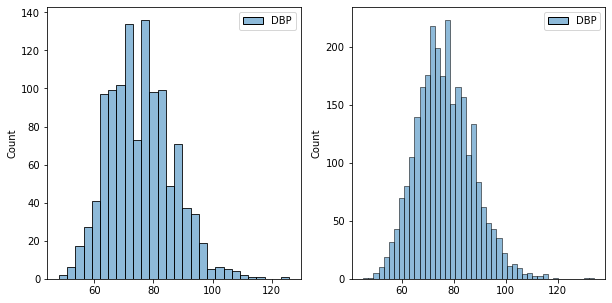

In [4]:
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

x = data_copy.drop(columns = 'DBP')
y = data_copy[['DBP']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = y_test, ax = axes[0])
sns.histplot(data = y_train, ax = axes[1])

ks_statistics, ks_p_value = ks_2samp(data1 = y_train.DBP.to_list(), data2= y_test.DBP.to_list())
print(ks_statistics, ks_p_value)
print('train셋과 test셋의 DBP칼럼의 분포를 히스토그램으로 확인해봤을때 유사함을 볼수있다.')
print('Kolmogorov-Smirnov 검정시행 결과 p-value가 0.244로 유이수준 0.05하에서 귀무가설을 기각하지 못해 분포가 유사하다 볼 수 있다.')

## 2-1 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오

Explained Variance Ratio: [0.26805672 0.20179437 0.13830835 0.10388132 0.07711019 0.06615994
 0.05702737]
Total Variance Ratio: 0.9123382530638755


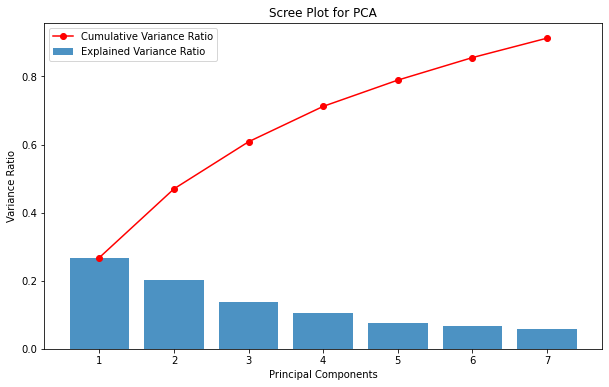

총 종속변수가 11개로 이를 전부다 이용하기엔 계산의 효율성이 떨어진다.
PCA를 이용해서 차원을 축소하였으며 7개의 주성분을 사용한다.


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_col = x.columns.to_list()
num_col.remove('Age')
Transformer = ColumnTransformer([('num', StandardScaler(), num_col)])
scaled_data = Transformer.fit_transform(x)

num_components = 7
pca = PCA(n_components = num_components)
principal_components = pca.fit_transform(scaled_data)
evr = pca.explained_variance_ratio_
print('Explained Variance Ratio:', evr)
print('Total Variance Ratio:', sum(evr))

explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Scree Plot 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='r', label='Cumulative Variance Ratio')

plt.title('Scree Plot for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.legend()
plt.show()

print('총 종속변수가 11개로 이를 전부다 이용하기엔 계산의 효율성이 떨어진다.')
print('PCA를 이용해서 차원을 축소하였으며 7개의 주성분을 사용한다.')

## 2-2 2-1 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명

array([[-0.61377359, -1.00984864,  0.64134098, ..., -0.78946027,
        -0.64556767,  1.14971504],
       [-2.37955454, -1.23589546, -0.82585535, ..., -0.2789524 ,
         0.83763421,  0.48875408],
       [-1.36780089,  2.45199379, -0.25863681, ..., -0.35499137,
         0.48321506,  0.1667101 ],
       ...,
       [-0.16491956, -1.49383537,  0.73201824, ..., -0.12711642,
        -0.29695043,  0.05317635],
       [ 0.60025584,  2.32815835,  2.35130566, ...,  0.64360348,
        -0.10669387, -1.50560498],
       [ 3.74301039, -0.51822143,  0.73049138, ...,  1.62860292,
        -0.41389249, -0.55227512]])

## 3-1 회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점 비교

1. 선형회귀

선정이유 : 
이해하기 쉽고 해석이 용이하며 각 변수들의 계수를 해석하기 간단하다.

장정 :
간단하고 해석이 용이. 
독립변수와 종속변수가 선형성을 가진다면 좋은 성능을 보인다.

단점 :
복잡한 비선형 관계를 모델링 하지 못한다.
다중공선성이 존재할 경우 성능이 떨어진다.

2. XGB

선정이유 : 
다수의 결정트리를 부스팅으로 조합하여 높은 정확도를 제공한다.

장점 : 
뛰어난 예측 성능을 보인다.
다양한 유형의 데이터에 적용가능하다.

단점 :
모델이 복잡하여 해석이 어렵다.
학습시간이 상대적으로 길다.

3. 랜덤포레스트

선정이유 : 
다수의 결정트리를 앙상블로 조합하여 과적합을 줄이고 안정적인 예측을 제공한다.

장점 : 
과적합을 줄이고 안정적인 예측을 제공한다.
다양한 특성 조합을 고려하여 모델의 다양성을 증가시킨다.

단점 : 
모델이 복잡하여 해석이 어렵다.
작은 데이터셋에서는 성능이 좋지 않을수 있다.

## 3-2. 1-3에서 구분한 데이터를 기준으로 3개의 회귀 분석 모델링을 진행하고 평가지표 rmse로 가장 최적화된 알고리즘 선정

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state = 37)
model3 = XGBRegressor()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

print('LinearRegression :', np.sqrt(mean_squared_error(y_test, y_pred1)))
print('RandomForest :', np.sqrt(mean_squared_error(y_test, y_pred2)))
print('XGB :', np.sqrt(mean_squared_error(y_test, y_pred3)))
print('rmse는 선형회귀의 결과가 제일 작았다.')
print('선형회귀가 성능이 제일 좋은것으로 보일 수 있으나 변수의 스케일링 여부나\n여타변수에의해 결과는 달라질 수 있다.')

LinearRegression : 9.94471313631798
RandomForest : 10.065645455662944
XGB : 10.720904687684367
rmse는 선형회귀의 결과가 제일 작았다.
선형회귀가 성능이 제일 좋은것으로 보일 수 있으나 변수의 스케일링 여부나
여타변수에의해 결과는 달라질 수 있다.


## 3-3 3-2에서 가장 성능 좋은 알고리즘을 이용하여 K-Fold 교차검증을 수행하시오.

In [7]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = 10
kf = KFold(n_splits = k_fold)

cv_results = cross_val_score(model1, x_train, y_train, cv=kf, scoring = 'neg_mean_squared_error')

cv_rmse_results = np.sqrt(-cv_results)

print('성능이 가장좋았던 선형회귀 모델로 교차검증진행')
print('10개의 fold 로 진행하였고 결과는 다음과 같다.')
print(f'K-fold Cross Validation RMSE: {cv_rmse_results}')
print(f'Mean RMSE: {cv_rmse_results.mean()}')

성능이 가장좋았던 선형회귀 모델로 교차검증진행
10개의 fold 로 진행하였고 결과는 다음과 같다.
K-fold Cross Validation RMSE: [ 9.89318836 11.27498868  9.74715888  9.54255408 10.783918    9.87642003
 10.20036312  9.82263068 10.34907792  9.21447624]
Mean RMSE: 10.070477599054483


## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2_v2.csv
- 데이터 설명 : 자전거사고 다발지역 개별사고 정보
1) 대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
2) 다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역
3) 종속 변수 : 피해자신체상해정도 

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2_v2.csv')
df.head()

,사고년도,가해자성별,가해자연령,가해차종,가해자신체상해정도,피해자성별,피해자연령,피해차종,피해자신체상해정도,사고유형,가해자법규위반,기상상태,시각,사건번호
0,2015,남,46세,승합차,상해없음,여,64세,자전거,경상,차대차 - 기타,안전운전불이행,맑음,2015-07-03_10시,ID_796
1,2019,남,53세,승용차,상해없음,여,57세,자전거,경상,차대차 - 후진중충돌,안전운전불이행,맑음,2019-10-12_10시,ID_6697
2,2015,남,39세,승용차,상해없음,남,63세,자전거,중상,차대차 - 기타,기타,맑음,2015-03-23_20시,ID_919
3,2016,남,12세,자전거,상해없음,남,52세,보행자,경상,차대사람 - 길가장자리구역통행중,안전운전불이행,맑음,2016-04-10_15시,ID_2512
4,2015,남,54세,승용차,상해없음,남,63세,자전거,중상,차대차 - 기타,안전운전불이행,맑음,2015-08-04_6시,ID_75


## 4-1 발생시각을 통해 평일인지 주말인지를 구분하는  '주말여부'  범주형 변수 추가하고 데이터 분포를 확인하라. (월 ~ 금은 평일, 토요일과 일요일을 주말)

In [9]:
df['날짜'] = pd.to_datetime(df['시각'].str[:10])
df['주말여부'] = df['날짜'].dt.day_name().apply(lambda x : '주말' if x in ('Saturday', 'Sunday') else '평일')
print(df.groupby('주말여부').count())
print('총 데이터의 수는 7,826개이고 그중 5,950건은 평일, 1,876건은 주말이다.')

      사고년도  가해자성별  가해자연령  가해차종  가해자신체상해정도  피해자성별  피해자연령  피해차종  피해자신체상해정도  \
주말여부                                                                       
주말    1876   1876   1876  1876       1876   1876   1876  1876       1876   
평일    5950   5950   5950  5950       5950   5950   5950  5950       5950   

      사고유형  가해자법규위반  기상상태    시각  사건번호    날짜  
주말여부                                         
주말    1876     1876  1876  1876  1876  1876  
평일    5950     5950  5950  5950  5950  5950  
총 데이터의 수는 7,826개이고 그중 5,950건은 평일, 1,876건은 주말이다.


## 4-2 '피해자신체상해정도' 에 따라 각 독립변수들이 유의한지 통계적 검정하라.

In [14]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, anova_single

df_copy = df[df['가해자연령'] != '불명']
df_copy['가해자연령'] = df_copy.가해자연령.str[:-1].astype(int)
df_copy['피해자연령'] = df_copy.피해자연령.str[:-1].astype(int)
df_copy['시각'] = df_copy.시각.str[11:-1].astype(int)

l = df_copy.columns.to_list()
l.remove('사건번호')
l.remove('날짜')
l.remove('피해자신체상해정도')

for i in l:
    if i in ['가해자연령', '피해자연령', '시각']:
        model = ols(f'{i} ~ C(피해자신체상해정도)', df_copy).fit()
        anova_table = anova_lm(model)
        p_val = anova_table.iloc[0,-1]
        print(i,' p_vlaue :', p_val)
    else:
        chi2, p, _, _ = chi2_contingency(pd.crosstab(df_copy[i], df_copy['피해자신체상해정도']))
        print(i,' p_vlaue :', p)
        
print('가해자연령과 피해자연령은 수치형으로 바꿔주었다.')
print('시각 칼럼은 차원이 너무 커 시간만 추출하여 수치형으로 바꿔주었다.')
print('사건번호는 분석과 무관한 칼럼이기에 제외해주었다.')
print('수치형 데이터는 ANOVA로 범주형 데이터는 카이제곱검정으로 진행한 결과')
print('유의한 변수는 가해차종, 가해자신체상해정도, 피해자성별, 피해자연령, 피해차종, 사고유형, 가해자법규위반, 시각 이었다.')

사고년도  p_vlaue : 0.2037122080146262
가해자성별  p_vlaue : 0.4583715414795001
가해자연령  p_vlaue : 0.9587908425270038
가해차종  p_vlaue : 4.153636072702362e-05
가해자신체상해정도  p_vlaue : 0.03668284299047161
피해자성별  p_vlaue : 9.462347636005921e-06
피해자연령  p_vlaue : 2.4886695301872657e-80
피해차종  p_vlaue : 0.001151194013164915
사고유형  p_vlaue : 0.005716531307184528
가해자법규위반  p_vlaue : 0.007564283316152476
기상상태  p_vlaue : 0.4390668597761834
시각  p_vlaue : 4.693942095993653e-14
주말여부  p_vlaue : 1.0
가해자연령과 피해자연령은 수치형으로 바꿔주었다.
시각 칼럼은 차원이 너무 커 시간만 추출하여 수치형으로 바꿔주었다.
사건번호는 분석과 무관한 칼럼이기에 제외해주었다.
수치형 데이터는 ANOVA로 범주형 데이터는 카이제곱검정으로 진행한 결과
유의한 변수는 가해차종, 가해자신체상해정도, 피해자성별, 피해자연령, 피해차종, 사고유형, 가해자법규위반, 시각 이었다.


## 4-3 4-2 에서 유의한 변수들만을 가지고 '피해자신체상해정도'를 기준으로 SMOTE 오버샘플링을 수행하고 샘플링 데이터와 기존데이터를 합친 전체 데이터에 대해 범주형변수는 변수별 빈도를 나타내고 연속형이면 평균을 나타내시오

In [45]:
from imblearn.over_sampling import SMOTENC
df_target = df_copy[['가해차종', '가해자신체상해정도', '피해자성별', '피해자연령', '피해차종', '사고유형', '가해자법규위반', '시각', '피해자신체상해정도']]

x = df_target.drop('피해자신체상해정도', axis = 1)
y = df_target[['피해자신체상해정도']]

categorical_columns = x.select_dtypes(include='object').columns.to_list()
numeric_columns = x.select_dtypes(exclude='object').columns.to_list()

smotenc = SMOTENC(categorical_features=categorical_columns, random_state=67)
x_smotenc, y_smotenc = smotenc.fit_resample(x, y)

combined_data = pd.concat([x_smotenc, y_smotenc], axis=1)

for i in df_target.columns.to_list():
    if i in numeric_columns:
        print(i)
        print(combined_data[i].mean())
        print('\n')
    else:
        print(i)
        print(combined_data[i].value_counts())
        print('\n')

가해차종
승용차            5811
자전거            1678
화물차             884
이륜차             415
승합차             394
원동기장치자전거        124
건설기계             27
특수차              12
개인형이동수단(PM)       6
기타                3
농기계               1
사륜오토바이(ATV)       1
Name: 가해차종, dtype: int64


가해자신체상해정도
상해없음    8795
기타불명     232
경상       212
부상신고     117
Name: 가해자신체상해정도, dtype: int64


피해자성별
남    6309
여    3047
Name: 피해자성별, dtype: int64


피해자연령
48.40904232578025


피해차종
자전거            8236
보행자             950
이륜차             117
승용차              28
원동기장치자전거         22
화물차               1
기타                1
개인형이동수단(PM)       1
Name: 피해차종, dtype: int64


사고유형
차대차 - 측면충돌           2623
차대차 - 기타             2590
차대차 - 측면직각충돌         2140
차대차 - 정면충돌            557
차대사람 - 기타             373
차대사람 - 횡단중            319
차대차 - 추돌 - 진행중        269
차대사람 - 보도통행중          186
차대차 - 추돌              177
차대사람 - 차도통행중           41
차대사람 - 길가장자리구역통행중      31
차대차 - 추돌 - 주정차중        26
차대차 - 후진중충돌            24
Name: 사고유형, dtype: 

## 4-4 4-3 데이터를 가지고 '피해자신체상해정도' 을 종속변수로 하여 로지스틱회귀분석, XGB 분류 분류 모델을 만들고 성능 비교를 하고 영향력 있는 변수를 확인하라

In [57]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

model4 = LogisticRegression()
model5 = XGBClassifier()

categorical_columns = x_smotenc.select_dtypes(include='object').columns.to_list()
numeric_columns = x_smotenc.select_dtypes(exclude='object').columns.to_list()

scaler = StandardScaler()
encoder = OneHotEncoder()
pipeline = ColumnTransformer([('num', StandardScaler(), numeric_columns), ('cat', OneHotEncoder(), categorical_columns)])
x_transformed = pipeline.fit_transform(x_smotenc)

label_encoder = LabelEncoder()
y_smotenc = label_encoder.fit_transform(y_smotenc)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_smotenc, test_size = 0.3, stratify = y_smotenc, random_state = 101)

model4.fit(x_train, y_train)
model5.fit(x_train, y_train)

y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)

print('로지스틱 회귀의 성능을 살펴보자.')
print('f1_score:',f1_score(y_test, y_pred4))
print('recall_score:',recall_score(y_test, y_pred4))
print('precision_score:',precision_score(y_test, y_pred4))
print('accuracy_score:',accuracy_score(y_test, y_pred4))
print('XGB 분류의 성능을 살펴보자.')
print('f1_score:',f1_score(y_test, y_pred5))
print('recall_score:',recall_score(y_test, y_pred5))
print('precision_score:',precision_score(y_test, y_pred5))
print('accuracy_score:',accuracy_score(y_test, y_pred5))
print('정확도는 XGB가 높으나 f1_score는 로지스틱이 높다.')
print('허나 둘 모두 유사한 수치를 보이고 있어 성능의 차이가 크지 않다.')

로지스틱 회귀의 성능을 살펴보자.
f1_score: 0.6175084175084176
recall_score: 0.6531339031339032
precision_score: 0.5855683269476373
accuracy_score: 0.5952974706091914
XGB 분류의 성능을 살펴보자.
f1_score: 0.6083044982698962
recall_score: 0.6260683760683761
precision_score: 0.5915208613728129
accuracy_score: 0.596722479515497
정확도는 XGB가 높으나 f1_score는 로지스틱이 높다.
허나 둘 모두 유사한 수치를 보이고 있어 성능의 차이가 크지 않다.


# 통계 (40점)

## 5. 
3개의 공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.    
각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p5.png)

In [58]:
from scipy.optimize import linprog

# 비용 행렬 (공장A, 공장B, 공장C)
cost_matrix = [
    [20, 5, 35],
    [15, 2, 20],
    [3, 14, 17]
]

# 공장별 총 생산량
supply = [75, 55, 60]

# 지역별 총 수요량
demand = [80, 50, 60]

# 선형 프로그래밍 최적화
result = linprog(
    c=[cost for row in cost_matrix for cost in row],  # 비용 행렬을 1차원으로 변환
    A_eq=[[1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1]],  # 공급 제약 조건
    b_eq=supply,  # 공급 제약 조건 값
    A_ub=[[1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1]],  # 수요 제약 조건
    b_ub=demand,  # 수요 제약 조건 값
    bounds=[(0, None) for _ in range(9)],  # 변수의 범위 (0 이상)
    method='highs'  # 선형 프로그래밍 최적화 알고리즘
)

# 최적 해 출력
print("최소 배송 비용:", result.fun)

# 최적 배송 계획 출력
print("최적 배송 계획:")
optimal_plan = result.x.reshape((3, 3))
print(optimal_plan)

최소 배송 비용: 2100.0
최적 배송 계획:
[[25. 50.  0.]
 [ 0.  0. 55.]
 [55.  0.  5.]]


## 데이터 설명
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv
- 데이터 설명 : 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3/ 범주형) 설문조사

## 6.1 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정해라.

In [59]:
data = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')
print('귀무가설 : 연령대별로 헤드셋 선호도에 차이가 없다.')
print('연구가설 : 연령대별로 헤드셋 선호도에 차이가 있다.')

귀무가설 : 연령대별로 헤드셋 선호도에 차이가 없다.
연구가설 : 연령대별로 헤드셋 선호도에 차이가 있다.


## 6.2 유의수준 하에서 통계 검정해라

In [60]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, anova_single

#cnt_copy = cnt.melt('Unnamed: 0')
#cnt_copy.rename(columns = {'Unnamed: 0':'contract'})

model = ols('선호도 ~ C(나이)', data).fit()

anova_table = anova_lm(model)
print(anova_table)
print('일원분산분석결과 p-value가 0.929202로 귀무가설을 기각하지못한다.')
print('즉, 연령대별로 헤드셋 선호도에 차이가 없다고 볼 수 있다.')

             df      sum_sq   mean_sq         F    PR(>F)
C(나이)       2.0    0.092872  0.046436  0.073449  0.929202
Residual  274.0  173.228428  0.632221       NaN       NaN
일원분산분석결과 p-value가 0.929202로 귀무가설을 기각하지못한다.
즉, 연령대별로 헤드셋 선호도에 차이가 없다고 볼 수 있다.


## 데이터 설명
아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.

## 7.1 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라. (소숫점 이하 4번째 자리에서 반올림)

In [63]:
from scipy.stats import binom

bi_daughters = binom(6,0.5)
proba1 = bi_daughters.pmf(4) + bi_daughters.pmf(5) + bi_daughters.pmf(6)
bi_families = binom(5, proba1)
proba2 = bi_families.pmf(3) + bi_families.pmf(4) + bi_families.pmf(3)
print('한 가족에서 딸이 4명이상일 확률은', proba1, '이다.')
print('이를 이용하면 구하는 확률은', round(proba2,3),'이다.')

한 가족에서 딸이 4명이상일 확률은 0.34375 이다.
이를 이용하면 구하는 확률은 0.396 이다.


## 7.2 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가? (소숫점 이하 4번째 자리에서 반올림)

In [64]:
mu = 5*proba2
print('5가족 중 4명 이상 딸을 가질 가족 수의 기대값은', round(mu,3),'이다.')

5가족 중 4명 이상 딸을 가질 가족 수의 기대값은 1.978 이다.


created by datamanim [web-link](https://www.datamanim.com)